In [1]:
#Autor: Alma
import pandas as pd
from datetime import datetime
import time

pd.set_option("expand_frame_repr", False)
df_gfi = pd.read_csv('gfi.csv',usecols=['created_at','repository_url'])
df_other_iss= pd.read_csv('other_issues.csv',usecols=['created_at','repository_url'])
df_gfi['created_at'] = pd.to_datetime(df_gfi['created_at'])
print(df_gfi.shape)

(9110, 2)


In [3]:
# first_issues_count = df_gfi.groupby([df_gfi['created_at'].dt.year,'repository_url'], as_index=False).count()
# first_issues_count = df_gfi.groupby(df_gfi['created_at'].dt.year, as_index=False)["repository_url"].nunique()
first_issues_count = df_gfi.groupby(df_gfi['created_at'].dt.year).agg(total = pd.NamedAgg('repository_url',aggfunc=pd.Series.nunique))
first_issues_count['created_at']= first_issues_count.index
first_issues_count['created_at'] = pd.to_datetime(first_issues_count['created_at'], format='%Y')
print(first_issues_count)

            total created_at
created_at                  
2008.0          1 2008-01-01
2009.0          1 2009-01-01
2010.0          4 2010-01-01
2011.0          6 2011-01-01
2012.0         26 2012-01-01
2013.0         43 2013-01-01
2014.0         61 2014-01-01
2015.0         94 2015-01-01
2016.0        129 2016-01-01
2017.0        156 2017-01-01
2018.0         95 2018-01-01
2019.0          1 2019-01-01
2020.0          1 2020-01-01


In [8]:
df_issues_cutted = first_issues_count.head(10)

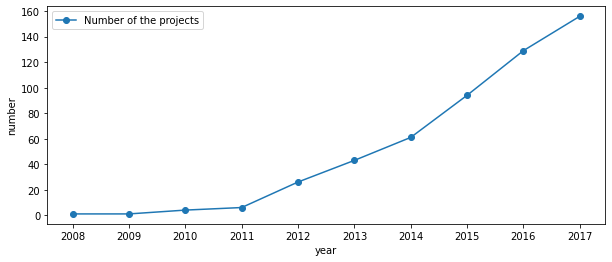

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import PercentFormatter

import matplotlib.dates as mdates
import numpy
fig, ax = plt.subplots(figsize=(10, 4))
# plt.xticks(first_issues_count['created_at']) 
# plt.yticks(first_issues_count['created_at'])
# ax = fig.add_subplot(111)
# xs = np.logspace(1,10,10)
# ax.set_yscale('log')

plt.plot_date(df_issues_cutted['created_at'], df_issues_cutted['total'],linestyle='solid',label='Number of the projects')

plt.legend()
plt.ylabel("number",fontsize=10)
plt.xlabel("year",fontsize=10)
plt.show()